# Required Packages, Modules and Metrics

In [1]:
# Modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Evaluation Metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay


%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Extraction

In [2]:
# Import csv file to DataFrame format
url_data = pd.read_csv("url_dataset.csv")

In [3]:
# Show first five rows
url_data.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [4]:
# Show columns
print(url_data.columns)

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

# Data Cleaning

In [5]:
# Count NaN values in each column
url_data.isna().sum()

# Total number of NaN values
count_nan = url_data.isna().sum().sum()
print("\n", "Number of NaN values before substitution: ", count_nan)


 Number of NaN values before substitution:  19183


In [6]:
# Replace missing values (NaN and Infinity values) with 0

# Replace Infinity with NaN
url_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill all NaN values with 0
url_data.fillna(0, inplace=True)

In [7]:
# Confirm that there are no NaN values in the dataset
url_data.isna().any()

count_nan = url_data.isna().sum().sum()
print("\n", "Number of NaN values after substitution: ", count_nan)


 Number of NaN values after substitution:  0


# Exploratory Data Analysis

In [8]:
# Get number of rows and columns
row, col = url_data.shape

print("The dataset has {} rows and {} columns".format(row, col))

The dataset has 36707 rows and 80 columns


## Datatype and Range of Values of Columns

In [9]:
# Show the names and datatypes of columns
url_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36707 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [10]:
# Show descriptive statistics of numerical data (datatype - float & int)
url_data.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.00000,36707.00000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.0,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000
mean,21.908110,2.857439,8.954668,5.401719,9.746016,4.521506,2.857439,14.976517,10.216117,3.363909,0.116517,3.244449,0.182663,2.395129,0.930204,0.007328,0.922876,0.061814,0.560111,92.945297,16.907320,69.05296,69.05296,6.815267,2.449070,34.344539,0.669962,0.236741,2.161321,0.232119,4.671155,0.338186,0.001389,-0.999619,2.866156,-1.0,0.623347,17.444956,10.474079,0.558395,1.213311,1.239001,6.874765,4.495491,68.165146,14.351323,10.902335,7.531969,29.923965,15.715912,48.241098,8.456725,8.529082,7.734138,2.070831,0.037214,1.297300,3.831885,0.139892,3.121094,1.682785,0.095546,0.037239,0.003767,0.103373,0.027209,-0.475103,9.701882,1.856894,1.727545,3.600049,2.685237,1.903261,0.722350,0.842443,0.521174,0.711232,0.507658,-0.208866
std,94.280669,0.906562,4.278406,1.986858,4.856580,2.856182,0.906562,13.351315,10.845807,13.447289,0.606963,13.445774,1.112706,13.293604,2.692333,0.253727,2.675460,0.591369,2.301820,95.299612,7.648725,95.30716,95.30716,13.215634,0.785388,97.354275,0.159520,0.271793,6.423116,0.130322,6.480310,0.364968,0.037249,0.019526,1.518403,0.0,0.161263,93.785703,18.034275,1.720052,4.842470,3.854567,17.343843,16.590541,79.002743,6.779777,15.592792,8.993364,80.159459,78.926758,95.155979,4.401473,3.521190,3.796621,5.361594,0.196213,2.071099,1.824176,0.458507,3.192752,4.229709,0.095776,0.104059,0.271787,0.333583,0.275307,0.600192,5.054621,0.904671,2.719231,4.783213,4.557171,4.512421,0.048820,0.066251,0.487556,0.414355,0.519682,0.891513
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,4.000000,0.00000,0.00

In [11]:
# Label ranges : URL Types
url_data['URL_Type_obf_Type'].value_counts()

Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64

In [12]:
# Show the number of unique values for each column
for col in url_data.columns:
        print(col, url_data[col].nunique())

Querylength 319
domain_token_count 15
path_token_count 43
avgdomaintokenlen 162
longdomaintokenlen 52
avgpathtokenlen 835
tld 15
charcompvowels 150
charcompace 127
ldl_url 133
ldl_domain 20
ldl_path 132
ldl_filename 22
ldl_getArg 132
dld_url 34
dld_domain 12
dld_path 33
dld_filename 15
dld_getArg 31
urlLen 389
domainlength 86
pathLength 380
subDirLen 380
fileNameLen 146
this.fileExtLen 5
ArgLen 341
pathurlRatio 2802
ArgUrlRatio 2772
argDomanRatio 1600
domainUrlRatio 2519
pathDomainRatio 2463
argPathRatio 2046
executable 2
isPortEighty 2
NumberofDotsinURL 20
ISIpAddressInDomainName 1
CharacterContinuityRate 382
LongestVariableValue 306
URL_DigitCount 186
host_DigitCount 31
Directory_DigitCount 66
File_name_DigitCount 50
Extension_DigitCount 168
Query_DigitCount 159
URL_Letter_Count 483
host_letter_count 76
Directory_LetterCount 125
Filename_LetterCount 100
Extension_LetterCount 467
Query_LetterCount 452
LongestPathTokenLength 343
Domain_LongestWordLength 34
Path_LongestWordLength 43
sub

## Visualizations

URL_Type_obf_Type  PortEighty
Defacement         Yes           7929
                   No               1
benign             Yes           7781
malware            Yes           6701
                   No              11
phishing           Yes           7584
                   No               2
spam               Yes           6698
Name: PortEighty, dtype: int64


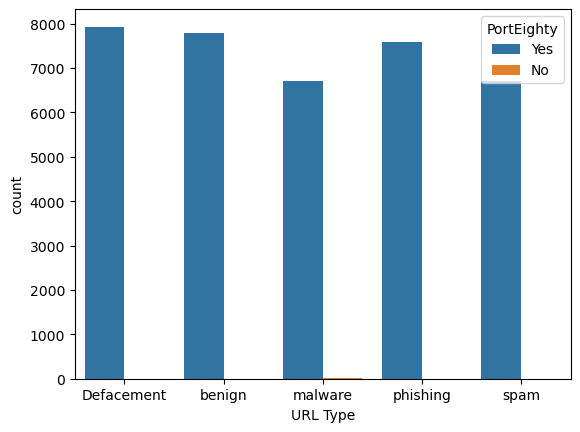

In [13]:
# Display count of URL_types that use the HTTP port (80)

url_data['PortEighty'] = url_data['isPortEighty'].map(lambda a: 'No' if a == 0 else 'Yes')

print(url_data.groupby('URL_Type_obf_Type')['PortEighty'].value_counts())

sns.countplot(data=url_data, x='URL_Type_obf_Type', hue='PortEighty')
plt.xlabel('URL Type')

plt.show()

URL_Type_obf_Type
Defacement    24.882598
benign         4.057705
malware        7.497467
phishing       2.818613
spam          75.184234
Name: Querylength, dtype: float64


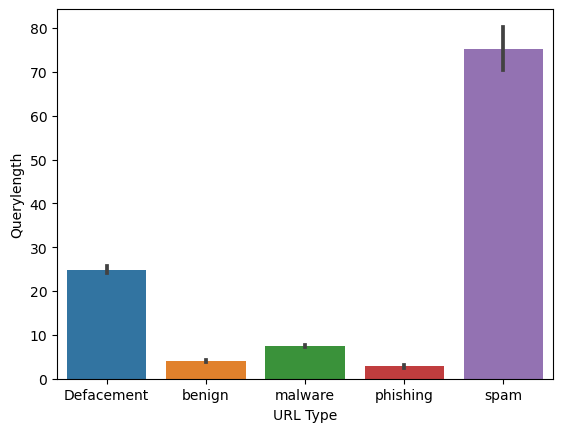

In [14]:
# Display mean of query_length per URL_type
# Lines show 95% confidence intervals for the mean

print(url_data.groupby('URL_Type_obf_Type')['Querylength'].mean())

sns.barplot(data=url_data, x='URL_Type_obf_Type', y='Querylength')
plt.xlabel('URL Type')

plt.show()

URL_Type_obf_Type
Defacement     86.466583
benign         79.377843
malware        79.775030
phishing       72.607039
spam          152.609286
Name: urlLen, dtype: float64


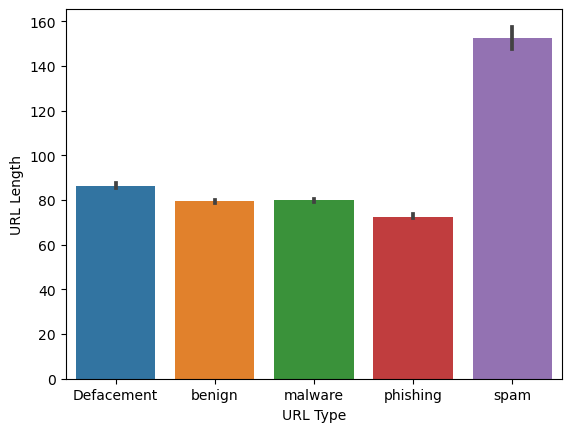

In [15]:
# Display mean of url_length per URL_type
# Lines show 95% confidence intervals for the mean

print(url_data.groupby('URL_Type_obf_Type')['urlLen'].mean())

sns.barplot(data=url_data, x='URL_Type_obf_Type', y='urlLen')
plt.xlabel('URL Type')
plt.ylabel('URL Length')

plt.show()

URL_Type_obf_Type
Defacement     60.975662
benign         60.364092
malware        57.377235
phishing       44.203533
spam          128.553747
Name: pathLength, dtype: float64


<Axes: xlabel='URL_Type_obf_Type', ylabel='pathLength'>

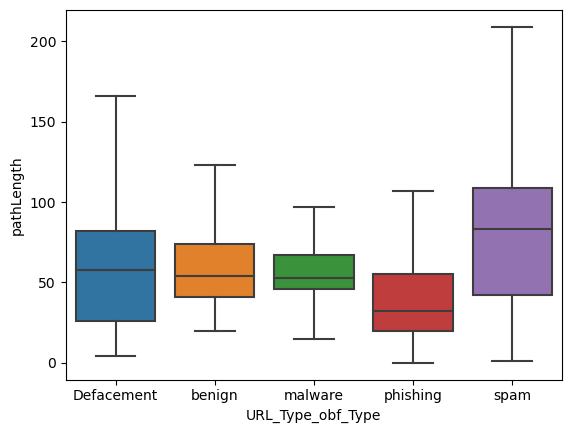

In [16]:
# Show distribution of path_length wrt URL_type

print(url_data.groupby('URL_Type_obf_Type')['pathLength'].mean())

sns.boxplot(data=url_data, x='URL_Type_obf_Type', y='pathLength', sym="")

URL_Type_obf_Type
Defacement     4
benign         3
malware        8
phishing      19
spam           5
Name: domain_token_count, dtype: int64


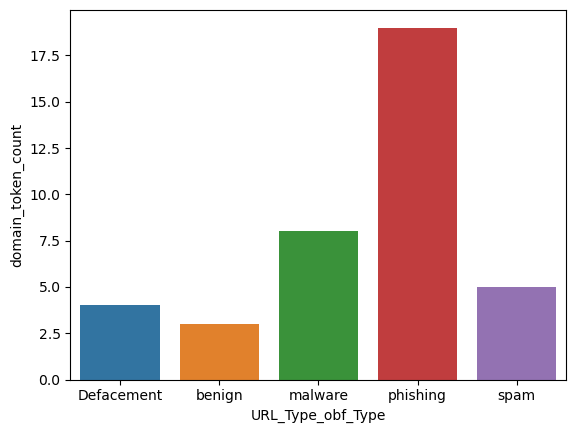

In [17]:
# Display maximum domain_token_count per URL_type

print(url_data.groupby('URL_Type_obf_Type')['domain_token_count'].max())

sns.barplot(data=url_data, x='URL_Type_obf_Type', y='domain_token_count', estimator='max', errorbar=None)
plt.show()

# Feature Engineering
### to select and transfrom relevant features

## Encoding Categorical Features

### Data Transformation for Binary Classification:
-  Benign = 0
-  Others = 1

In [18]:
# Mapping of BENIGN to 0, and others to 1
label_binary = url_data['URL_Type_obf_Type'].map(lambda a: 0 if a == 'benign' else 1)
url_data['Label_Binary'] = label_binary

print(url_data['Label_Binary'].value_counts())
url_data.head()

1    28926
0     7781
Name: Label_Binary, dtype: int64


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type,PortEighty,Label_Binary
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,0.0,-1.0,Defacement,Yes,1
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement,Yes,1
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement,Yes,1
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement,Yes,1
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,0.0,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement,Yes,1


Malicious URLs    28926
Benign             7781
Name: Label_Binary, dtype: int64


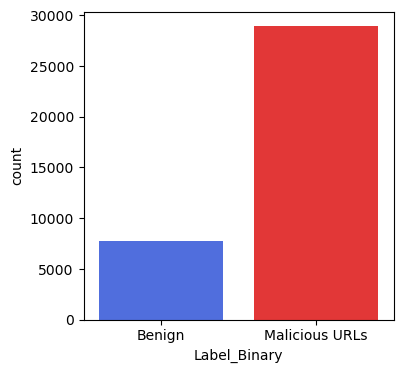

In [19]:
# Show Binary Classification Labels
bin_labels_count = url_data['Label_Binary'].value_counts()
bin_labels_count.index = ['Malicious URLs', 'Benign']
print(bin_labels_count)

plt.figure(figsize=(4, 4))
sns.countplot(data=url_data, x='Label_Binary', palette=['#3861f5', '#ff1a1a'])
plt.xticks([0, 1], ['Benign', 'Malicious URLs'])
plt.show()

### Data Transformation for Multi-class Classification:
- Benign = 0
- Defacement = 1
- Malware = 2
- Phishing = 3
- Spam = 4

In [20]:
# Mapping of all labels to unique numbers

def map_label(label):
    if label == 'Defacement':
        label_type = 1
    elif label == 'malware':
        label_type = 2
    elif label == 'phishing':
        label_type = 3
    elif label == 'spam':
        label_type = 4
    else:
        label_type = 0
        
    return label_type

url_data['Label_Multiple'] = url_data['URL_Type_obf_Type'].apply(map_label)

print(url_data['Label_Multiple'].value_counts())

1    7930
0    7781
3    7586
2    6712
4    6698
Name: Label_Multiple, dtype: int64


Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64


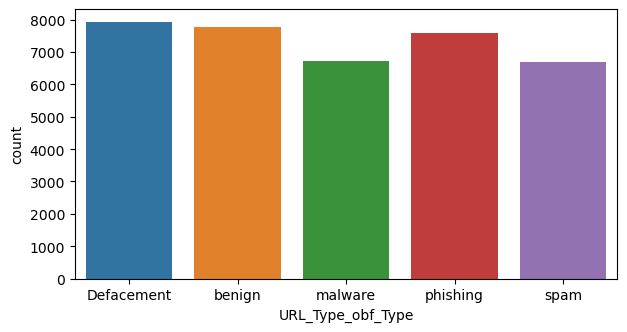

In [21]:
# Show Multi-class Classification Labels
print(url_data['URL_Type_obf_Type'].value_counts())

plt.figure(figsize=(7, 3.5))
sns.countplot(data=url_data, x='URL_Type_obf_Type')
plt.show()

In [22]:
# Drop target and categorical columns to get only numeric features
numeric_features = list(url_data.columns.drop(['PortEighty', 'URL_Type_obf_Type', 'Label_Binary', 'Label_Multiple']))

# Subset dataset to get training data
training_set = url_data[numeric_features]
training_set.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

# Dimensionality Reduction with Principal Component Analysis (PCA)

In [23]:
# Instantiate PCA
pca = PCA()

# Apply dimensionality reduction on training_set
transformed_data = pca.fit_transform(training_set)

In [24]:
# Print the shape of the transformed data
print("Shape of data after PCA:", transformed_data.shape)

Shape of data after PCA: (36707, 79)


# Model Fitting, Prediction & Evaluation 

In [25]:
# Set seed for reproducibility
SEED = 21

# the models
models = [RandomForestClassifier(random_state=SEED),
          DecisionTreeClassifier(random_state=SEED),
          KNeighborsClassifier(),
          LogisticRegression(random_state=SEED, max_iter=300),
          LinearSVC(random_state=SEED)]

## Binary Classification

In [26]:
bin_y = url_data['Label_Binary'].values

# Split data into 70% training set and 30% test set
# X: features; y: targets
bin_X_train, bin_X_test, bin_y_train, bin_y_test = train_test_split(transformed_data, bin_y,
                                                                    test_size=0.3, random_state=SEED)


The Metrics for RandomForestClassifier are: 

Accuracy: 0.989
Precision: 0.988
Recall: 0.997
F1_Score: 0.993
Specificity: 0.956
ROC_AUC: 0.977 


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2340
           1       0.99      1.00      0.99      8673

    accuracy                           0.99     11013
   macro avg       0.99      0.98      0.98     11013
weighted avg       0.99      0.99      0.99     11013

[[2236  104]
 [  22 8651]]


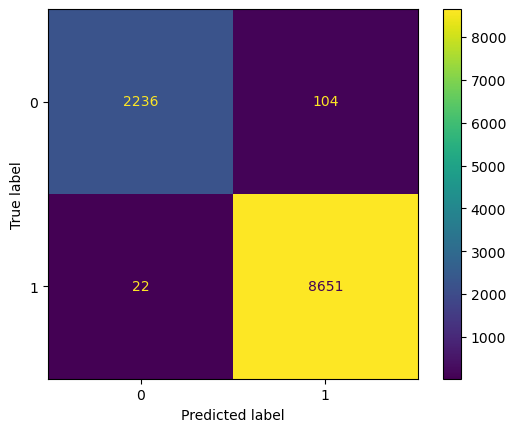

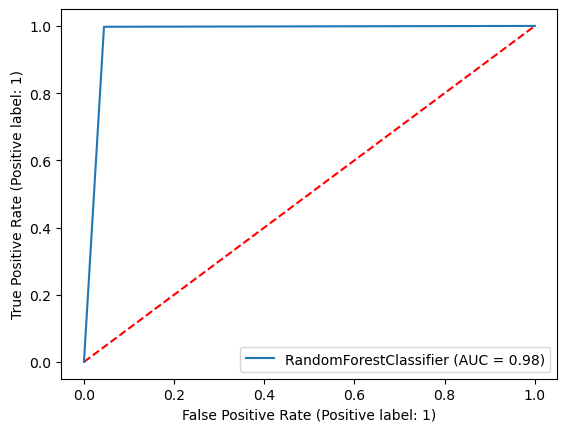


The Metrics for DecisionTreeClassifier are: 

Accuracy: 0.964
Precision: 0.976
Recall: 0.978
F1_Score: 0.977
Specificity: 0.912
ROC_AUC: 0.945 


              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2340
           1       0.98      0.98      0.98      8673

    accuracy                           0.96     11013
   macro avg       0.95      0.94      0.95     11013
weighted avg       0.96      0.96      0.96     11013

[[2133  207]
 [ 193 8480]]


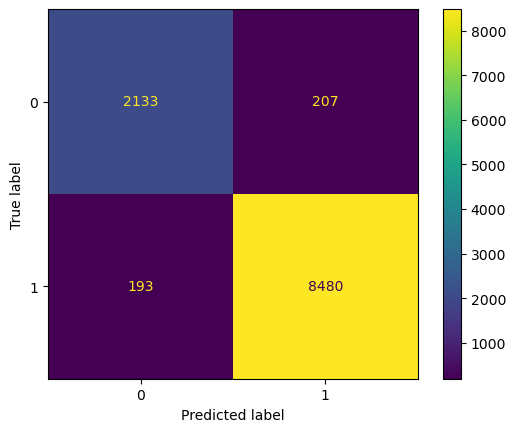

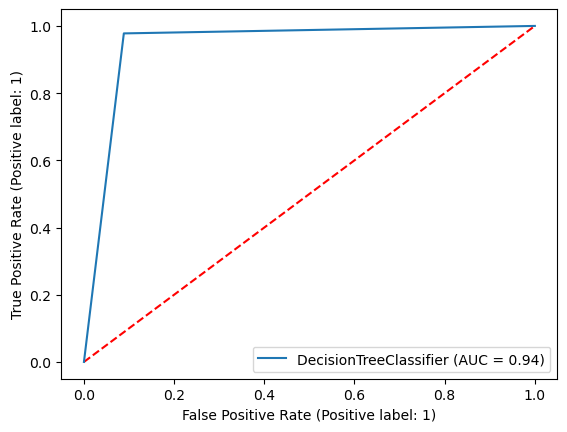


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.969
Precision: 0.978
Recall: 0.984
F1_Score: 0.981
Specificity: 0.916
ROC_AUC: 0.95 


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2340
           1       0.98      0.98      0.98      8673

    accuracy                           0.97     11013
   macro avg       0.96      0.95      0.95     11013
weighted avg       0.97      0.97      0.97     11013

[[2144  196]
 [ 143 8530]]


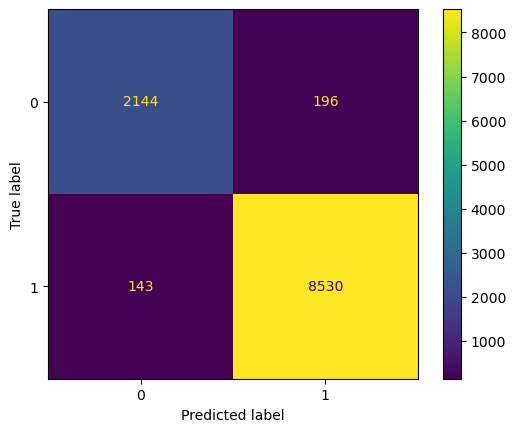

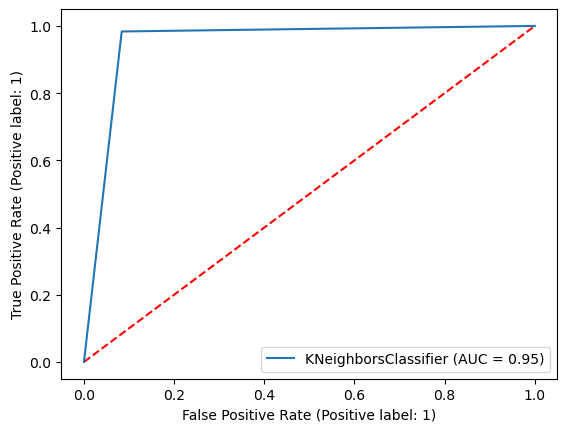


The Metrics for LogisticRegression are: 

Accuracy: 0.926
Precision: 0.954
Recall: 0.952
F1_Score: 0.953
Specificity: 0.829
ROC_AUC: 0.89 


              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2340
           1       0.95      0.95      0.95      8673

    accuracy                           0.93     11013
   macro avg       0.89      0.89      0.89     11013
weighted avg       0.93      0.93      0.93     11013

[[1939  401]
 [ 415 8258]]


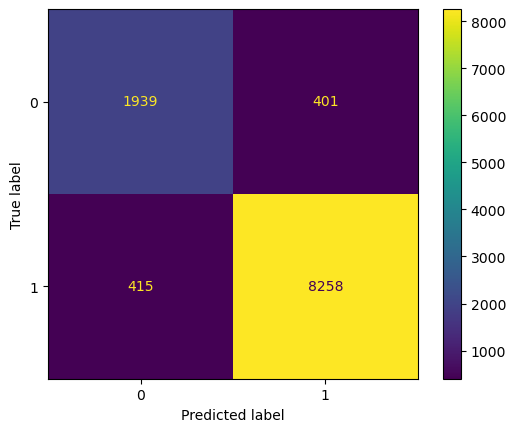

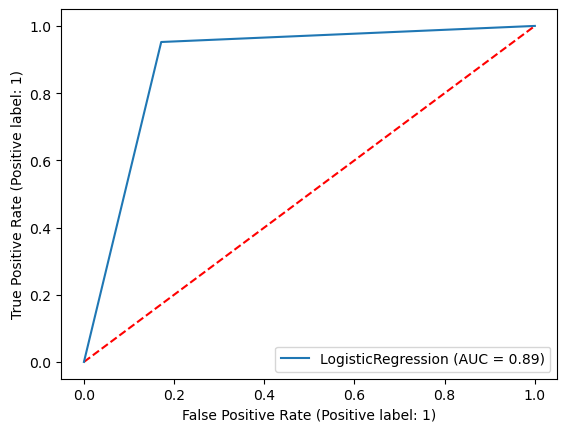


The Metrics for LinearSVC are: 

Accuracy: 0.906
Precision: 0.942
Recall: 0.939
F1_Score: 0.94
Specificity: 0.785
ROC_AUC: 0.862 


              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2340
           1       0.94      0.94      0.94      8673

    accuracy                           0.91     11013
   macro avg       0.86      0.86      0.86     11013
weighted avg       0.91      0.91      0.91     11013

[[1837  503]
 [ 530 8143]]


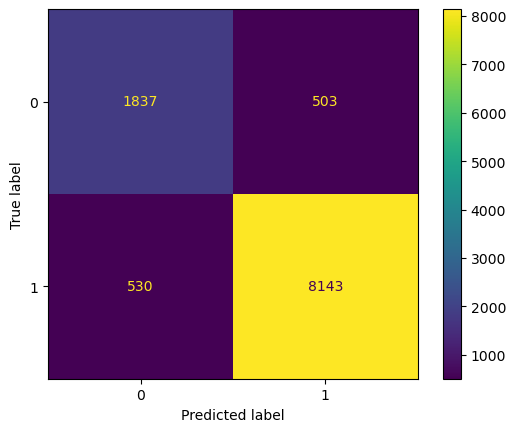

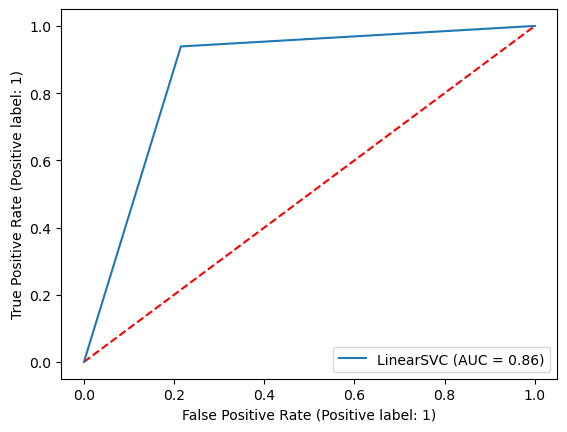

In [27]:
# Lists for evaluation metrics
bin_model = []
bin_accuracy = []
bin_precision = []
bin_recall = [] # Recall = Sensitivity = TPR
bin_f1 =[]
bin_specificity = [] # Specificity = TNR
bin_roc_auc =[]

for model in models:
    model_name = model.__class__.__name__
    model.fit(bin_X_train, bin_y_train) # Training
    model_pred = model.predict(bin_X_test) # Prediction

    cm = metrics.confusion_matrix(bin_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    accuracy = np.round(accuracy_score(bin_y_test, model_pred), 3)
    precision = np.round(metrics.precision_score(bin_y_test, model_pred), 3)
    recall = np.round(metrics.recall_score(bin_y_test, model_pred), 3)
    f1_score = np.round(metrics.f1_score(bin_y_test, model_pred), 3)
    specificity = np.round(cm[0,0]/(cm[0,0]+cm[0,1]), 3)
    roc_auc = np.round(roc_auc_score(bin_y_test, model_pred), 3)

    # Append results to corresponding lists
    bin_model.append(model_name)
    bin_accuracy.append(accuracy)
    bin_precision.append(precision)
    bin_recall.append(recall)
    bin_f1.append(f1_score)
    bin_specificity.append(specificity)
    bin_roc_auc.append(roc_auc)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('Recall: {}'.format(recall))
    print('F1_Score: {}'.format(f1_score))
    print('Specificity: {}'.format(specificity))
    print('ROC_AUC: {} \n\n'.format(roc_auc))

    print(classification_report(bin_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'r--')
    RocCurveDisplay.from_predictions(bin_y_test, model_pred, name=str(model_name), ax=ax)
    plt.show()

    print("================================================================================================================")

## Compilation of Binary Classification Results

In [28]:
# Show lists of results

print("Models: ", bin_model)
print("Accuracies: ", bin_accuracy)
print("Precision: ", bin_precision)
print("F1_Score: ", bin_f1)
print("Specificity/TNR: ", bin_specificity)
print("ROC_AUC: ", bin_roc_auc)

Models:  ['RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression', 'LinearSVC']
Accuracies:  [0.989, 0.964, 0.969, 0.926, 0.906]
Precision:  [0.988, 0.976, 0.978, 0.954, 0.942]
F1_Score:  [0.993, 0.977, 0.981, 0.953, 0.94]
Specificity/TNR:  [0.956, 0.912, 0.916, 0.829, 0.785]
ROC_AUC:  [0.977, 0.945, 0.95, 0.89, 0.862]


In [29]:
# Convert lists to a single DataFrame

bin_dict_of_lists = {
    "Bin_Model": bin_model,
    "Bin_Accuracy": bin_accuracy,
    "Bin_Precision": bin_precision,
    "Bin_Recall/Sensitivity/TPR": bin_recall,
    "Bin_F1_Score": bin_f1,
    "Bin_Specificity/TNR": bin_specificity,
    "Bin_ROC_AUC": bin_roc_auc
}

bin_all_results = pd.DataFrame(bin_dict_of_lists)
bin_all_results

,Bin_Model,Bin_Accuracy,Bin_Precision,Bin_Recall/Sensitivity/TPR,Bin_F1_Score,Bin_Specificity/TNR,Bin_ROC_AUC
0,RandomForestClassifier,0.989,0.988,0.997,0.993,0.956,0.977
1,DecisionTreeClassifier,0.964,0.976,0.978,0.977,0.912,0.945
2,KNeighborsClassifier,0.969,0.978,0.984,0.981,0.916,0.950
3,LogisticRegression,0.926,0.954,0.952,0.953,0.829,0.890
4,LinearSVC,0.906,0.942,0.939,0.940,0.785,0.862


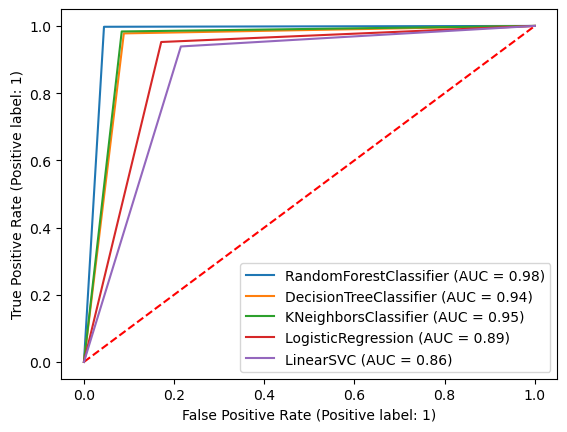

In [30]:
ax = plt.gca()
ax.plot([0, 1], [0, 1], 'r--')

for model in models:
        model_name = model.__class__.__name__
        
        model.fit(bin_X_train, bin_y_train)
        model_pred = model.predict(bin_X_test)
        
        RocCurveDisplay.from_predictions(bin_y_test, model_pred, name=str(model_name), ax=ax)
    
plt.show()

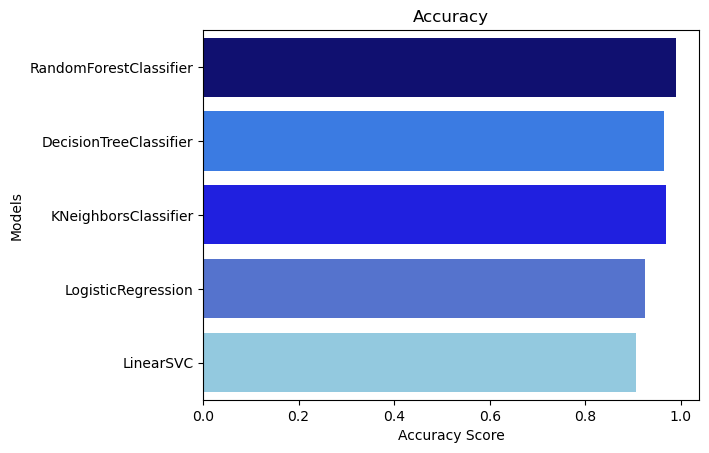

In [31]:
custom_palette1 = ["navy", "#1F75FE", "blue", "royalblue", "skyblue"]

sns.barplot(x=bin_accuracy, y=bin_model, palette=custom_palette1)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.show()

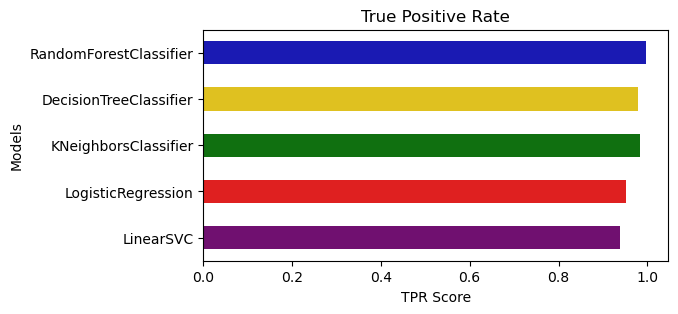

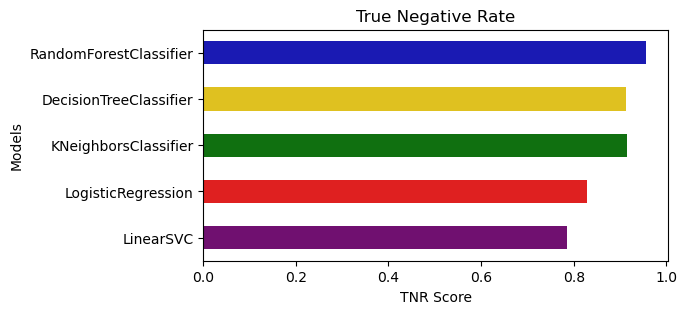

In [32]:
custom_palette2 = ["mediumblue", "gold", "green", "red", "purple"]

plt.figure(figsize=(6,3))
sns.barplot(x=bin_recall, y=bin_model, width=0.5, palette=custom_palette2)
plt.title("True Positive Rate")
plt.xlabel("TPR Score")
plt.ylabel("Models")
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(x=bin_specificity, y=bin_model, width=0.5, palette=custom_palette2)
plt.title("True Negative Rate")
plt.xlabel("TNR Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

## Multi-class Classification

In [33]:
multi_y = url_data['Label_Multiple'].values

# Split data into 70% training set and 30% test set
# X: features; y: targets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(transformed_data, multi_y,
                                                                            test_size=0.3, random_state=SEED)


The Metrics for RandomForestClassifier are: 

Accuracy: 0.97

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2340
           1       0.98      0.97      0.98      2372
           2       0.99      0.97      0.98      1978
           3       0.93      0.97      0.95      2334
           4       0.99      0.96      0.97      1989

    accuracy                           0.97     11013
   macro avg       0.97      0.97      0.97     11013
weighted avg       0.97      0.97      0.97     11013

[[2296    7    5   30    2]
 [  17 2299    1   51    4]
 [  10    2 1926   37    3]
 [  46   19    5 2257    7]
 [   9   11    0   65 1904]]


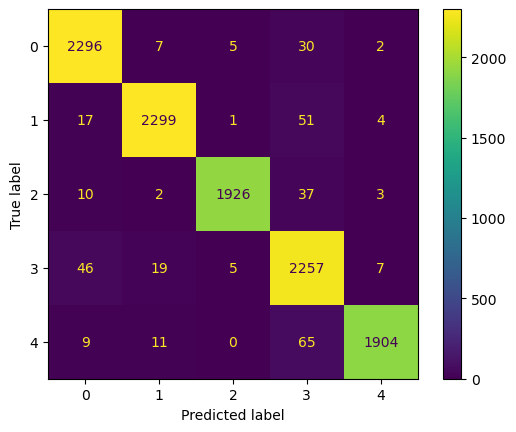


The Metrics for DecisionTreeClassifier are: 

Accuracy: 0.916

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2340
           1       0.93      0.94      0.94      2372
           2       0.93      0.96      0.94      1978
           3       0.88      0.83      0.85      2334
           4       0.92      0.93      0.93      1989

    accuracy                           0.92     11013
   macro avg       0.92      0.92      0.92     11013
weighted avg       0.91      0.92      0.92     11013

[[2162   35   45   81   17]
 [  36 2233    8   75   20]
 [  15   11 1893   44   15]
 [ 121   83   85 1937  108]
 [  22   35    7   67 1858]]


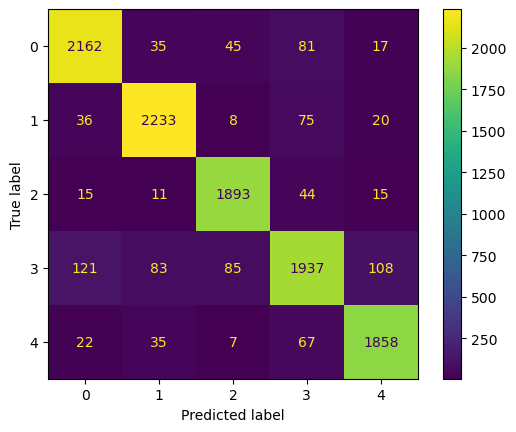


The Metrics for KNeighborsClassifier are: 

Accuracy: 0.916

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2340
           1       0.91      0.95      0.93      2372
           2       0.91      0.93      0.92      1978
           3       0.90      0.85      0.88      2334
           4       0.94      0.93      0.93      1989

    accuracy                           0.92     11013
   macro avg       0.92      0.92      0.92     11013
weighted avg       0.92      0.92      0.92     11013

[[2173   35   60   37   35]
 [  27 2242   19   68   16]
 [  43   22 1835   65   13]
 [  87  120   84 1988   55]
 [  33   47   12   52 1845]]


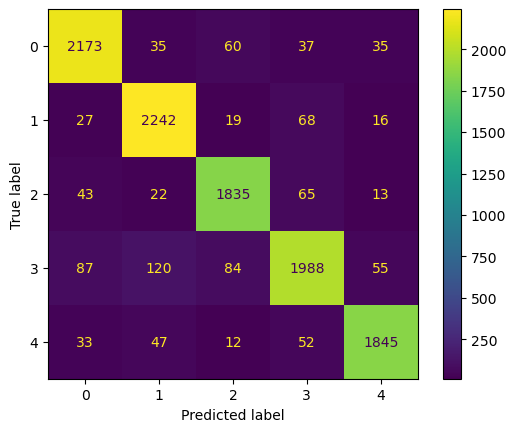


The Metrics for LogisticRegression are: 

Accuracy: 0.807

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2340
           1       0.82      0.81      0.82      2372
           2       0.76      0.62      0.68      1978
           3       0.78      0.81      0.79      2334
           4       0.88      0.89      0.89      1989

    accuracy                           0.81     11013
   macro avg       0.81      0.80      0.80     11013
weighted avg       0.81      0.81      0.80     11013

[[2065   51  135   68   21]
 [  85 1932  108  152   95]
 [ 325  132 1219  255   47]
 [ 106  130  121 1896   81]
 [  10  122   12   67 1778]]


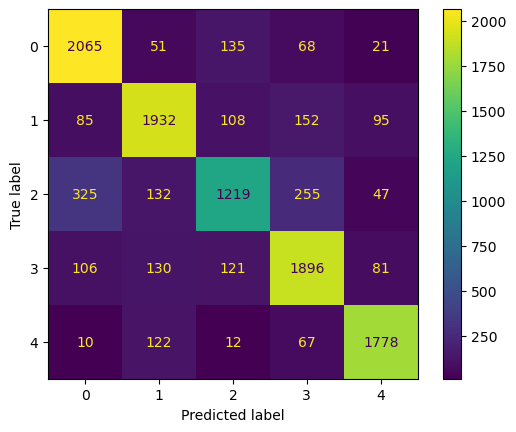


The Metrics for LinearSVC are: 

Accuracy: 0.721

              precision    recall  f1-score   support

           0       0.73      0.51      0.60      2340
           1       0.75      0.78      0.77      2372
           2       0.66      0.71      0.69      1978
           3       0.63      0.86      0.73      2334
           4       0.91      0.74      0.82      1989

    accuracy                           0.72     11013
   macro avg       0.74      0.72      0.72     11013
weighted avg       0.74      0.72      0.72     11013

[[1197  238  446  449   10]
 [  80 1862   82  293   55]
 [  84  171 1406  292   25]
 [  82   69  130 2003   50]
 [ 189  138   54  139 1469]]


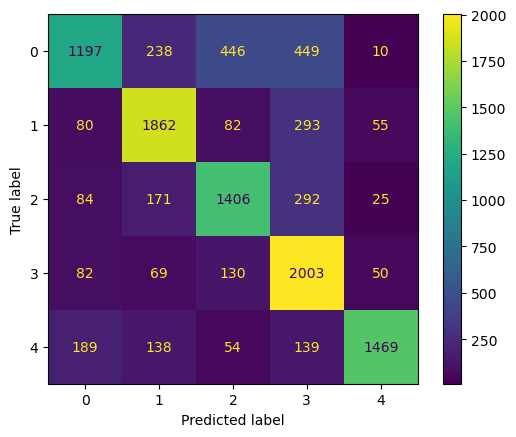

In [34]:
# Lists for evaluation metrics
multi_model = []
multi_accuracy = []

for model in models:
    model_name = model.__class__.__name__
    model.fit(multi_X_train, multi_y_train)   # Training
    model_pred = model.predict(multi_X_test)  # Prediction

    cm = metrics.confusion_matrix(multi_y_test, model_pred, labels=model.classes_)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Mapping of scorer name to scorer function
    accuracy = np.round(accuracy_score(multi_y_test, model_pred), 3)

    # Append results to corresponding lists
    multi_model.append(model_name)
    multi_accuracy.append(accuracy)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {}\n'.format(accuracy))

    print(classification_report(multi_y_test, model_pred))
    print(cm)
    cm_display.plot()
    plt.show()

    print("==========================================================================================================")

## Compilation of Multi-class Classification Results

In [35]:
# Convert lists to a single DataFrame
multi_dict_of_lists = {"Multi_Model": multi_model, "Multi_Accuracy": multi_accuracy}
multi_all_results = pd.DataFrame(multi_dict_of_lists)

multi_all_results

,Multi_Model,Multi_Accuracy
0,RandomForestClassifier,0.970
1,DecisionTreeClassifier,0.916
2,KNeighborsClassifier,0.916
3,LogisticRegression,0.807
4,LinearSVC,0.721


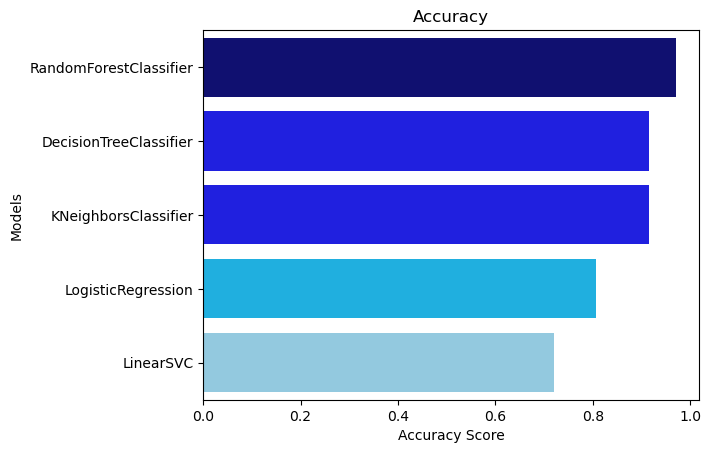

In [36]:
custom_palette3 = ["navy", "blue", "blue", "deepskyblue", "skyblue"]

sns.barplot(x=multi_accuracy, y=multi_model, palette=custom_palette3)
plt.title("Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

## Comparison of Accuracies for Binary and Multi-class Classification

In [37]:
bin_and_multi_lists = {
    "Model": bin_model,
    "Bin_Accuracy": bin_accuracy,
    "Multi_Accuracy": multi_accuracy,
}

all_accuracies = pd.DataFrame(bin_and_multi_lists)
all_accuracies

,Model,Bin_Accuracy,Multi_Accuracy
0,RandomForestClassifier,0.989,0.970
1,DecisionTreeClassifier,0.964,0.916
2,KNeighborsClassifier,0.969,0.916
3,LogisticRegression,0.926,0.807
4,LinearSVC,0.906,0.721


In [38]:
all_accuracies_long = all_accuracies.melt(id_vars=["Model"],
                                          value_vars=['Bin_Accuracy','Multi_Accuracy'],
                                          var_name=['Accuracy_Score'], value_name='value')
all_accuracies_long 

,Model,Accuracy_Score,value
0,RandomForestClassifier,Bin_Accuracy,0.989
1,DecisionTreeClassifier,Bin_Accuracy,0.964
2,KNeighborsClassifier,Bin_Accuracy,0.969
3,LogisticRegression,Bin_Accuracy,0.926
4,LinearSVC,Bin_Accuracy,0.906
5,RandomForestClassifier,Multi_Accuracy,0.970
6,DecisionTreeClassifier,Multi_Accuracy,0.916
7,KNeighborsClassifier,Multi_Accuracy,0.916
8,LogisticRegression,Multi_Accuracy,0.807
9,LinearSVC,Multi_Accuracy,0.721


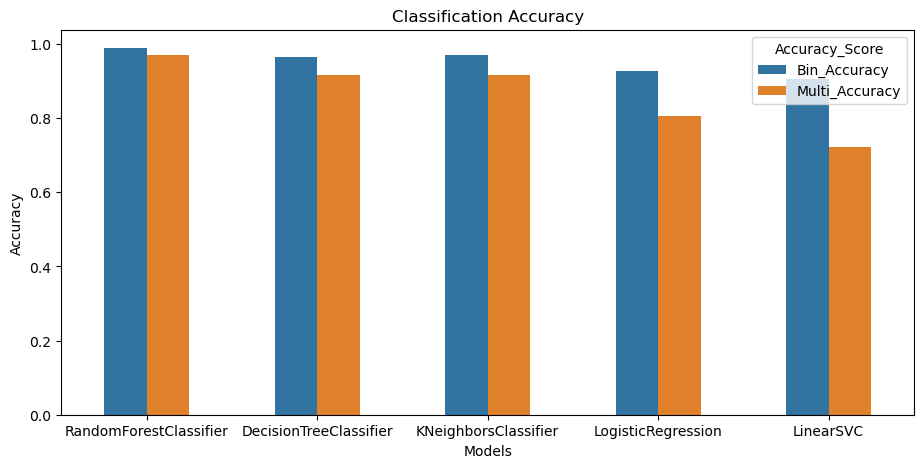

In [39]:
fig = plt.subplots(figsize =(11, 5))

sns.barplot(data=all_accuracies_long, x='Model', y='value', hue='Accuracy_Score', width=0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy")

plt.show()